# Elecciones Madrid 2021 #

## Objetivo del presente trabajo ##

El presente trabajo tiene como objetivo analizar los resultados de las pasadas elecciones del 4 de mayo en Madrid. Para ello se utlizarán los resultados electorales oficiales del siguiente enlace [https://resultados2021.comunidad.madrid/Mesas/es]. Se analizarán los resultados a nivel global de la Comunidad de Madrid, para luego pasar a un análisis más pormenorizado de la siguiente forma: Madrid Ciudad, conjunto de ciudades de relevancia y el conjunto de ciudades y pueblos fuera de los principales núcleos de población.

Se analizarán los datos en su conjunto para luego incidir en la distribución espacial del voto de los partidos que finalmente obtuvieron representación. Un análisis de la edad de la población en cada uno de los espacios (edad, nivel adquisitivo, etc) nos permitirá saber si exise un claro perfil de votante para cada uno de los partidos.

In [1]:
# leer csv:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('Elecciones_Madrid_2021_Municipios.csv', delimiter=';', thousands='.', decimal=',')

In [3]:
data = data.rename(columns={"Codcir":"cpro", "Codmun":"cmun", "Municipio":"municipio"})

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   cpro                        179 non-null    int64  
 1   cmun                        179 non-null    int64  
 2   municipio                   179 non-null    object 
 3   Unnamed: 3                  0 non-null      float64
 4   Censo                       179 non-null    int64  
 5   Certif. Alta                179 non-null    int64  
 6   Censo Total                 179 non-null    int64  
 7   Votos Totales               179 non-null    int64  
 8   Votos Blancos               179 non-null    int64  
 9   Votos Nulos                 179 non-null    int64  
 10  Abstención                  179 non-null    int64  
 11  Votos Válidos               179 non-null    int64  
 12  Votos Candidaturas          179 non-null    int64  
 13  Cs                          179 non

In [5]:
data['municipio']=data['municipio'].astype(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   cpro                        179 non-null    int64  
 1   cmun                        179 non-null    int64  
 2   municipio                   179 non-null    object 
 3   Unnamed: 3                  0 non-null      float64
 4   Censo                       179 non-null    int64  
 5   Certif. Alta                179 non-null    int64  
 6   Censo Total                 179 non-null    int64  
 7   Votos Totales               179 non-null    int64  
 8   Votos Blancos               179 non-null    int64  
 9   Votos Nulos                 179 non-null    int64  
 10  Abstención                  179 non-null    int64  
 11  Votos Válidos               179 non-null    int64  
 12  Votos Candidaturas          179 non-null    int64  
 13  Cs                          179 non

In [6]:
data.head()

,cpro,cmun,municipio,Unnamed: 3,Censo,Certif. Alta,Censo Total,Votos Totales,Votos Blancos,Votos Nulos,...,PCOE-PCPE,VOLT,VOX,P-LIB,POLE,MÁS MADRID,EB,UDEC,PODEMOS-IU,RECORTES CERO-PCAS-TC-GV-M
0,28,2,Ajalvir,NaN,3251,0,3251,2339,10,15,...,0,0,340,1,0,330,1,1,101,0
1,28,3,Alameda del Valle,NaN,195,0,195,168,3,0,...,0,0,16,0,0,36,0,0,11,0
2,28,5,Alcalá de Henares,NaN,136163,4,136167,100932,603,789,...,25,45,9735,21,10,15540,70,26,7017,29
3,28,6,Alcobendas,NaN,80401,2,80403,62036,297,363,...,12,36,5533,24,8,8212,60,44,3430,26
4,28,7,Alcorcón,NaN,126919,0,126919,97563,565,769,...,20,35,7841,14,4,16945,128,24,7707,66


In [7]:
data.iloc[0]

cpro                               28
cmun                                2
municipio                     Ajalvir
Unnamed: 3                        NaN
Censo                            3251
Certif. Alta                        0
Censo Total                      3251
Votos Totales                    2339
Votos Blancos                      10
Votos Nulos                        15
Abstención                        912
Votos Válidos                    2324
Votos Candidaturas               2314
Cs                                 56
PUM+J                               0
PCTE                                1
FE de las JONS                      3
PH                                  1
PACMA                               4
3e en acción                        1
PARTIDO AUTÓNOMOS                   1
P.S.O.E.                          325
PP                               1148
PCOE-PCPE                           0
VOLT                                0
VOX                               340
P-LIB       

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [9]:
municipios = 'https://raw.githubusercontent.com/FMullor/TopoJson/master/MadridMunicipios.geojson'
map_municipios = gpd.read_file(municipios)
map_municipios = map_municipios.sort_values('municipio')
map_municipios.head()

,id_0,iso,pais,id_1,communidad_,id_2,provincia,id_3,name_3,id_4,...,varname_4,ccn_4,cca_4,type_4,engtype_4,cpro,cmun,dc,codigo_post,geometry
156,215.0,ESP,Spain,8.0,Comunidad de Madrid,33.0,Madrid,234.0,n.a. (176),5876.0,...,None,0.0,None,Municipality,Municipality,28,002,9,28002,"MULTIPOLYGON (((-3.51150 40.53889, -3.50521 40..."
58,215.0,ESP,Spain,8.0,Comunidad de Madrid,33.0,Madrid,233.0,n.a. (175),5828.0,...,None,0.0,None,Municipality,Municipality,28,003,5,28003,"MULTIPOLYGON (((-3.80596 40.89047, -3.80951 40..."
86,215.0,ESP,Spain,8.0,Comunidad de Madrid,33.0,Madrid,234.0,n.a. (176),5877.0,...,None,0.0,None,Municipality,Municipality,28,005,3,28005,"MULTIPOLYGON (((-3.32142 40.47207, -3.32898 40..."
168,215.0,ESP,Spain,8.0,Comunidad de Madrid,33.0,Madrid,235.0,n.a. (177),5907.0,...,None,0.0,None,Municipality,Municipality,28,006,6,28006,"MULTIPOLYGON (((-3.67417 40.58897, -3.65981 40..."
154,215.0,ESP,Spain,8.0,Comunidad de Madrid,33.0,Madrid,235.0,n.a. (177),5908.0,...,None,0.0,None,Municipality,Municipality,28,007,2,28007,"MULTIPOLYGON (((-3.78781 40.35875, -3.79893 40..."


In [10]:
map_municipios.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 182 entries, 156 to 70
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id_0         182 non-null    float64 
 1   iso          182 non-null    object  
 2   pais         182 non-null    object  
 3   id_1         182 non-null    float64 
 4   communidad_  182 non-null    object  
 5   id_2         182 non-null    float64 
 6   provincia    182 non-null    object  
 7   id_3         182 non-null    float64 
 8   name_3       182 non-null    object  
 9   id_4         182 non-null    float64 
 10  municipio    182 non-null    object  
 11  varname_4    2 non-null      object  
 12  ccn_4        182 non-null    float64 
 13  cca_4        0 non-null      object  
 14  type_4       182 non-null    object  
 15  engtype_4    182 non-null    object  
 16  cpro         164 non-null    object  
 17  cmun         164 non-null    object  
 18  dc           164 non-

In [11]:
map_municipios = map_municipios[['municipio', 'geometry']]

# pruebas
# map_municipios['municipio'] = data['municipio']
# pruebas

map_municipios.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 182 entries, 156 to 70
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   municipio  182 non-null    object  
 1   geometry   182 non-null    geometry
dtypes: geometry(1), object(1)
memory usage: 4.3+ KB


In [12]:
map_municipios = map_municipios.fillna(0)
map_municipios['municipio'] = map_municipios['municipio'].astype(str)

map_municipios.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 182 entries, 156 to 70
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   municipio  182 non-null    object  
 1   geometry   182 non-null    geometry
dtypes: geometry(1), object(1)
memory usage: 4.3+ KB


In [13]:
map_municipios.iloc[0]

municipio                                              Ajalvir
geometry     (POLYGON ((-3.511504888534432 40.5388908386231...
Name: 156, dtype: object

In [14]:
map_municipios.iloc[-1]

municipio                                            Zarzalejo
geometry     (POLYGON ((-4.153540134429932 40.5314445495606...
Name: 70, dtype: object

In [15]:
map_municipios.head()

,municipio,geometry
156,Ajalvir,"MULTIPOLYGON (((-3.51150 40.53889, -3.50521 40..."
58,Alameda del Valle,"MULTIPOLYGON (((-3.80596 40.89047, -3.80951 40..."
86,AlcalÃ¡ de Henares,"MULTIPOLYGON (((-3.32142 40.47207, -3.32898 40..."
168,Alcobendas,"MULTIPOLYGON (((-3.67417 40.58897, -3.65981 40..."
154,AlcorcÃ³n,"MULTIPOLYGON (((-3.78781 40.35875, -3.79893 40..."


In [16]:
len(data)

179

In [17]:
len(map_municipios)

182

In [18]:
# comprobar valores diferentes de municipios
# 1.- valores comunes: el resultado es 143 que coincide después con los 144 valores de geometry que aparecen después
# CONCLUSIÓN: 
# 1.-tenemos que corregir los valores de 'municipio' en map_municipio
# 2.-buscar cuáles son los 3 valores de más que tiene map_municipio sobre data
# intersection_data = set(data['municipio']).intersection(set(map_municipios['municipio']))
# len(intersection_data)

intersection_map = set(map_municipios['municipio']).intersection(set(data['municipio']))
len(intersection_map)

143

In [19]:
# no_intersection_data = set(data['municipio']).difference(set(map_municipios['municipio']))
# len(no_intersection_data)
# no_intersection_data

# los valores que salen aquí hay que corregirlos para que sean iguales que en data
no_intersection_map = set(map_municipios['municipio']).difference(set(data['municipio']))
len(no_intersection_map)
no_intersection_map

{'AlcalÃ¡ de Henares',
 'AlcorcÃ³n',
 'CarabaÃ±a',
 'ChapinerÃ\xada',
 'ChinchÃ³n',
 'CobeÃ±a',
 'El VellÃ³n',
 'El Ã\x81lamo',
 'FuentidueÃ±a de Tajo',
 'GriÃ±Ã³n',
 'Horcajo de la Sierra',
 'JurisdicciÃ³n Macomunada de El Boalo y Manzanares el Real (El Chaparral)',
 'JurisdicciÃ³n Mancomunada de Cerdedilla y Navacerrada',
 'LeganÃ©s',
 'Morata de TajuÃ±a',
 'MÃ³stoles',
 'Navarredonda y San MamÃ©s',
 'Nuevo BaztÃ¡n',
 'Orusco de TajuÃ±a',
 'Perales de TajuÃ±a',
 'PinuÃ©car-Gandullas',
 'Pozuelo de AlarcÃ³n',
 'PrÃ¡dena del RincÃ³n',
 'RascafrÃ\xada',
 'RedueÃ±a',
 'San AgustÃ\xadn del Guadalix',
 'San MartÃ\xadn de Valdeiglesias',
 'San MartÃ\xadn de la Vega',
 'San SebastiÃ¡n de los Reyes',
 'Santa MarÃ\xada de la Alameda',
 'TorrejÃ³n de Ardoz',
 'TorrejÃ³n de Velasco',
 'TorrejÃ³n de la Calzada',
 'ValdepiÃ©lagos',
 'Valverde de AlcalÃ¡',
 'Villanueva de la CaÃ±ada',
 'Villarejo de SalvanÃ©s',
 'Villaviciosa de OdÃ³n'}

In [20]:
# cambiamos el nombre de los municipios con problemas y comprobamos de nuevo las diferencias
map_municipios['municipio'] = map_municipios['municipio'].replace([
 'AlcalÃ¡ de Henares',
 'AlcorcÃ³n',
 'CarabaÃ±a',
 'ChapinerÃ\xada',
 'ChinchÃ³n',
 'CobeÃ±a',
 'El VellÃ³n',
 'El Ã\x81lamo',
 'FuentidueÃ±a de Tajo',
 'GriÃ±Ã³n',
 'Horcajo de la Sierra',
 'JurisdicciÃ³n Macomunada de El Boalo y Manzanares el Real (El Chaparral)',
 'JurisdicciÃ³n Mancomunada de Cerdedilla y Navacerrada',
 'LeganÃ©s',
 'Morata de TajuÃ±a',
 'MÃ³stoles',
 'Navarredonda y San MamÃ©s',
 'Nuevo BaztÃ¡n',
 'Orusco de TajuÃ±a',
 'Perales de TajuÃ±a',
 'PinuÃ©car-Gandullas',
 'Pozuelo de AlarcÃ³n',
 'PrÃ¡dena del RincÃ³n',
 'RascafrÃ\xada',
 'RedueÃ±a',
 'San AgustÃ\xadn del Guadalix',
 'San MartÃ\xadn de Valdeiglesias',
 'San MartÃ\xadn de la Vega',
 'San SebastiÃ¡n de los Reyes',
 'Santa MarÃ\xada de la Alameda',
 'TorrejÃ³n de Ardoz',
 'TorrejÃ³n de Velasco',
 'TorrejÃ³n de la Calzada',
 'ValdepiÃ©lagos',
 'Valverde de AlcalÃ¡',
 'Villanueva de la CaÃ±ada',
 'Villarejo de SalvanÃ©s',
 'Villaviciosa de OdÃ³n'
], [
 'Alcalá de Henares',
 'Alcorcón',
 'Carabaña',
 'Chapinería',
 'Chinchón',
 'Cobeña',
 'El Vellón',
 'El Álamo',
 'Fuentidueña de Tajo',
 'Griñón',
 'Horcajo de la Sierra',
 'Jurisdicción Macomunada de El Boalo y Manzanares el Real (El Chaparral)',
 'Jurisdicción Mancomunada de Cerdedilla y Navacerrada',
 'Leganés',
 'Morata de Tajuña',
 'Móstoles',
 'Navarredonda y San Mamés',
 'Nuevo Baztán',
 'Orusco de Tajuña',
 'Perales de Tajuña',
 'Piñuécar-Gandullas',
 'Pozuelo de Alarcón',
 'Prádena del Rincón',
 'Rascafría',
 'Redueña',
 'San Agustín del Guadalix',
 'San Martín de Valdeiglesias',
 'San Martín de la Vega',
 'San Sebastián de los Reyes',
 'Santa María de la Alameda',
 'Torrejón de Ardoz',
 'Torrejón de Velasco',
 'Torrejón de la Calzada',
 'Valdepiélagos',
 'Valverde de Alcalá',
 'Villanueva de la Cañada',
 'Villarejo de Salvanés',
 'Villaviciosa de Odón'])

map_municipios.head()

,municipio,geometry
156,Ajalvir,"MULTIPOLYGON (((-3.51150 40.53889, -3.50521 40..."
58,Alameda del Valle,"MULTIPOLYGON (((-3.80596 40.89047, -3.80951 40..."
86,Alcalá de Henares,"MULTIPOLYGON (((-3.32142 40.47207, -3.32898 40..."
168,Alcobendas,"MULTIPOLYGON (((-3.67417 40.58897, -3.65981 40..."
154,Alcorcón,"MULTIPOLYGON (((-3.78781 40.35875, -3.79893 40..."


In [21]:
no_intersection_map = set(map_municipios['municipio']).difference(set(data['municipio']))
len(no_intersection_map)
no_intersection_map

{'Horcajo de la Sierra',
 'Jurisdicción Macomunada de El Boalo y Manzanares el Real (El Chaparral)',
 'Jurisdicción Mancomunada de Cerdedilla y Navacerrada'}

In [22]:
# veamos cuál de los valores del dataframe 'data' coincide con estos 3 valores de diferencia
data[data['municipio'].str.contains('Horcajo de la Sierra', na=False)]

,cpro,cmun,municipio,Unnamed: 3,Censo,Certif. Alta,Censo Total,Votos Totales,Votos Blancos,Votos Nulos,...,PCOE-PCPE,VOLT,VOX,P-LIB,POLE,MÁS MADRID,EB,UDEC,PODEMOS-IU,RECORTES CERO-PCAS-TC-GV-M
68,28,70,Horcajo de la Sierra-Aoslos,NaN,121,0,121,102,1,1,...,0,0,17,0,0,15,1,0,8,0


In [23]:
data[data['municipio'].str.contains('Manzanares', na=False)]

,cpro,cmun,municipio,Unnamed: 3,Censo,Certif. Alta,Censo Total,Votos Totales,Votos Blancos,Votos Nulos,...,PCOE-PCPE,VOLT,VOX,P-LIB,POLE,MÁS MADRID,EB,UDEC,PODEMOS-IU,RECORTES CERO-PCAS-TC-GV-M
70,28,72,Hoyo de Manzanares,NaN,6315,0,6315,4972,23,29,...,1,0,598,3,2,793,5,1,287,2
86,28,82,Manzanares el Real,NaN,6466,0,6466,4892,35,41,...,0,4,474,3,2,979,6,3,529,3


In [24]:
data[data['municipio'].str.contains('Navacerrada', na=False)]

,cpro,cmun,municipio,Unnamed: 3,Censo,Certif. Alta,Censo Total,Votos Totales,Votos Blancos,Votos Nulos,...,PCOE-PCPE,VOLT,VOX,P-LIB,POLE,MÁS MADRID,EB,UDEC,PODEMOS-IU,RECORTES CERO-PCAS-TC-GV-M
95,28,93,Navacerrada,NaN,2347,0,2347,1905,6,11,...,0,2,260,0,0,191,0,2,105,0


In [25]:
# ya sabemos con qué valores reemplazarlos:
map_municipios['municipio'] = map_municipios['municipio'].replace({
    'Horcajo de la Sierra': 'Horcajo de la Sierra-Aoslos',
    'Jurisdicción Macomunada de El Boalo y Manzanares el Real (El Chaparral)': 'Manzanares el Real',
    'Jurisdicción Mancomunada de Cerdedilla y Navacerrada': 'Navacerrada'
})

no_intersection_map = set(map_municipios['municipio']).difference(set(data['municipio']))
len(no_intersection_map)
no_intersection_map

set()

In [26]:
# map_municipios[map_municipios['municipio'].str.contains('Navacerrada', na=False)]
map_municipios[map_municipios['municipio'].str.contains('Manzanares', na=False)]
map_municipios[map_municipios['municipio'].str.contains('Horcajo', na=False)]

,municipio,geometry
75,Horcajo de la Sierra-Aoslos,"MULTIPOLYGON (((-3.56313 41.05871, -3.58192 41..."


In [27]:
# sale ok, pero con len(result)=163
# result = data.merge(map_municipios, on=['cpro', 'cmun'])

# sale ok, pero con len(result)=182
# result = pd.merge(data, map_municipios, left_index=True , right_index=True, how='outer')

# sale ok, pero con len(result)=179  ----> después falla a la hora de representar el mapa, no sé por qué
# result = pd.merge(data, map_municipios, how='inner', on=["cpro", "cmun"])
result = pd.merge(data, map_municipios, how='left', on='municipio')

# como en el ejemplo de maps:
# result = map_municipios.merge(data, left_on="municipio", right_on="municipio", how="inner")

data['municipio'] = data['municipio'].str.title()
data['municipio'] = data['municipio'].str.strip()
map_municipios['municipio'] = map_municipios['municipio'].str.title()
map_municipios['municipio'] = map_municipios['municipio'].str.strip()

# result = map_municipios.merge(data, left_on="cpro", right_on="cmun", how="inner")
# result = data.merge(map_municipios, left_on="municipio", right_on="cmun", how="inner")

# sale ok, pero con len(result)=179
# result = pd.merge(data, map_municipios, left_index=True , right_index=True, how='inner')

In [28]:
result.iloc[-1]

cpro                                                                         28
cmun                                                                        183
municipio                                                             Zarzalejo
Unnamed: 3                                                                  NaN
Censo                                                                      1219
Certif. Alta                                                                  0
Censo Total                                                                1219
Votos Totales                                                               879
Votos Blancos                                                                 2
Votos Nulos                                                                   9
Abstención                                                                  340
Votos Válidos                                                               870
Votos Candidaturas                      

In [29]:
len(result)

182

In [30]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 0 to 181
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   cpro                        182 non-null    int64   
 1   cmun                        182 non-null    int64   
 2   municipio                   182 non-null    object  
 3   Unnamed: 3                  0 non-null      float64 
 4   Censo                       182 non-null    int64   
 5   Certif. Alta                182 non-null    int64   
 6   Censo Total                 182 non-null    int64   
 7   Votos Totales               182 non-null    int64   
 8   Votos Blancos               182 non-null    int64   
 9   Votos Nulos                 182 non-null    int64   
 10  Abstención                  182 non-null    int64   
 11  Votos Válidos               182 non-null    int64   
 12  Votos Candidaturas          182 non-null    int64   
 13  Cs                  

In [31]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 0 to 181
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   cpro                        182 non-null    int64   
 1   cmun                        182 non-null    int64   
 2   municipio                   182 non-null    object  
 3   Unnamed: 3                  0 non-null      float64 
 4   Censo                       182 non-null    int64   
 5   Certif. Alta                182 non-null    int64   
 6   Censo Total                 182 non-null    int64   
 7   Votos Totales               182 non-null    int64   
 8   Votos Blancos               182 non-null    int64   
 9   Votos Nulos                 182 non-null    int64   
 10  Abstención                  182 non-null    int64   
 11  Votos Válidos               182 non-null    int64   
 12  Votos Candidaturas          182 non-null    int64   
 13  Cs                  

In [32]:
# result.iloc[-1]
# result['municipio'].iloc[[-1]]
result.head()

,cpro,cmun,municipio,Unnamed: 3,Censo,Certif. Alta,Censo Total,Votos Totales,Votos Blancos,Votos Nulos,...,VOLT,VOX,P-LIB,POLE,MÁS MADRID,EB,UDEC,PODEMOS-IU,RECORTES CERO-PCAS-TC-GV-M,geometry
0,28,2,Ajalvir,NaN,3251,0,3251,2339,10,15,...,0,340,1,0,330,1,1,101,0,"MULTIPOLYGON (((-3.51150 40.53889, -3.50521 40..."
1,28,3,Alameda del Valle,NaN,195,0,195,168,3,0,...,0,16,0,0,36,0,0,11,0,"MULTIPOLYGON (((-3.80596 40.89047, -3.80951 40..."
2,28,5,Alcalá de Henares,NaN,136163,4,136167,100932,603,789,...,45,9735,21,10,15540,70,26,7017,29,"MULTIPOLYGON (((-3.32142 40.47207, -3.32898 40..."
3,28,6,Alcobendas,NaN,80401,2,80403,62036,297,363,...,36,5533,24,8,8212,60,44,3430,26,"MULTIPOLYGON (((-3.67417 40.58897, -3.65981 40..."
4,28,7,Alcorcón,NaN,126919,0,126919,97563,565,769,...,35,7841,14,4,16945,128,24,7707,66,"MULTIPOLYGON (((-3.78781 40.35875, -3.79893 40..."


In [33]:
data.head()

,cpro,cmun,municipio,Unnamed: 3,Censo,Certif. Alta,Censo Total,Votos Totales,Votos Blancos,Votos Nulos,...,PCOE-PCPE,VOLT,VOX,P-LIB,POLE,MÁS MADRID,EB,UDEC,PODEMOS-IU,RECORTES CERO-PCAS-TC-GV-M
0,28,2,Ajalvir,NaN,3251,0,3251,2339,10,15,...,0,0,340,1,0,330,1,1,101,0
1,28,3,Alameda Del Valle,NaN,195,0,195,168,3,0,...,0,0,16,0,0,36,0,0,11,0
2,28,5,Alcalá De Henares,NaN,136163,4,136167,100932,603,789,...,25,45,9735,21,10,15540,70,26,7017,29
3,28,6,Alcobendas,NaN,80401,2,80403,62036,297,363,...,12,36,5533,24,8,8212,60,44,3430,26
4,28,7,Alcorcón,NaN,126919,0,126919,97563,565,769,...,20,35,7841,14,4,16945,128,24,7707,66


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   cpro                        179 non-null    int64  
 1   cmun                        179 non-null    int64  
 2   municipio                   179 non-null    object 
 3   Unnamed: 3                  0 non-null      float64
 4   Censo                       179 non-null    int64  
 5   Certif. Alta                179 non-null    int64  
 6   Censo Total                 179 non-null    int64  
 7   Votos Totales               179 non-null    int64  
 8   Votos Blancos               179 non-null    int64  
 9   Votos Nulos                 179 non-null    int64  
 10  Abstención                  179 non-null    int64  
 11  Votos Válidos               179 non-null    int64  
 12  Votos Candidaturas          179 non-null    int64  
 13  Cs                          179 non

In [35]:
data['geometry'] = map_municipios['geometry']

In [36]:
from geopandas import GeoDataFrame
data = GeoDataFrame(data)

#result = GeoDataFrame(result)

In [37]:
result.head()

,cpro,cmun,municipio,Unnamed: 3,Censo,Certif. Alta,Censo Total,Votos Totales,Votos Blancos,Votos Nulos,...,VOLT,VOX,P-LIB,POLE,MÁS MADRID,EB,UDEC,PODEMOS-IU,RECORTES CERO-PCAS-TC-GV-M,geometry
0,28,2,Ajalvir,NaN,3251,0,3251,2339,10,15,...,0,340,1,0,330,1,1,101,0,"MULTIPOLYGON (((-3.51150 40.53889, -3.50521 40..."
1,28,3,Alameda del Valle,NaN,195,0,195,168,3,0,...,0,16,0,0,36,0,0,11,0,"MULTIPOLYGON (((-3.80596 40.89047, -3.80951 40..."
2,28,5,Alcalá de Henares,NaN,136163,4,136167,100932,603,789,...,45,9735,21,10,15540,70,26,7017,29,"MULTIPOLYGON (((-3.32142 40.47207, -3.32898 40..."
3,28,6,Alcobendas,NaN,80401,2,80403,62036,297,363,...,36,5533,24,8,8212,60,44,3430,26,"MULTIPOLYGON (((-3.67417 40.58897, -3.65981 40..."
4,28,7,Alcorcón,NaN,126919,0,126919,97563,565,769,...,35,7841,14,4,16945,128,24,7707,66,"MULTIPOLYGON (((-3.78781 40.35875, -3.79893 40..."


In [38]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 0 to 181
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   cpro                        182 non-null    int64   
 1   cmun                        182 non-null    int64   
 2   municipio                   182 non-null    object  
 3   Unnamed: 3                  0 non-null      float64 
 4   Censo                       182 non-null    int64   
 5   Certif. Alta                182 non-null    int64   
 6   Censo Total                 182 non-null    int64   
 7   Votos Totales               182 non-null    int64   
 8   Votos Blancos               182 non-null    int64   
 9   Votos Nulos                 182 non-null    int64   
 10  Abstención                  182 non-null    int64   
 11  Votos Válidos               182 non-null    int64   
 12  Votos Candidaturas          182 non-null    int64   
 13  Cs                  

In [39]:
# vamos a corregir los nombres de las columnas de nuestro dataset antes de representarlos en el mapa:
result = result.rename(columns={
    'Censo': 'censo', 
    'Certif. Alta': 'certif_alta',
    'Censo Total': 'censo_alta',
    'Votos Totales': 'votos_totales',
    'Votos Blancos': 'votos_blancos',
    'Votos Nulos': 'votos_nulos',
    'Abstención': 'abstencion',
    'Votos Válidos': 'votos_validos',
    'Votos Candidaturas': 'votos_candidaturas',
    'Cs': 'cs',
    'PUM+J': 'pum_j',
    'PCTE': 'pcte',
    'FE de las JONS': 'fe_jons',
    'PH': 'ph',
    'PACMA': 'pacma',
    '3e en acción': '3e',
    'PARTIDO AUTÓNOMOS': 'partido_autonomos',
    'P.S.O.E.': 'psoe',
    'PP': 'pp',
    'PCOE-PCPE': 'pcoe_pcpe',
    'VOLT': 'volt',
    'VOX': 'vox',
    'P-LIB': 'plib',
    'POLE': 'pole',
    'MÁS MADRID': 'mas_madrid',
    'EB': 'eb',
    'UDEC': 'udec',
    'PODEMOS-IU': 'podemos_iu',
    'RECORTES CERO-PCAS-TC-GV-M': 'recortes_cero',
})

In [40]:
# convertimos las columnas de votos en float porque algunos aparecen como 'object':
# result['censo'] = result['censo'].replace(".", "")
# result['censo'] = result['censo'].astype(float)
# result['censo'].iloc[0]

In [43]:
# añado nuevas columnas
result["pp_share"] = result["pp"] / result["votos_totales"]
result["rel_pp_share"] = result["pp"] / (result["pp"]+result["psoe"])
result["psoe_share"] = result["psoe"] / result["votos_totales"]

result.head()

,cpro,cmun,municipio,Unnamed: 3,censo,certif_alta,censo_alta,votos_totales,votos_blancos,votos_nulos,...,pole,mas_madrid,eb,udec,podemos_iu,recortes_cero,geometry,pp_share,rel_pp_share,psoe_share
0,28,2,Ajalvir,NaN,3251,0,3251,2339,10,15,...,0,330,1,1,101,0,"MULTIPOLYGON (((-3.51150 40.53889, -3.50521 40...",0.490808,0.779362,0.138948
1,28,3,Alameda del Valle,NaN,195,0,195,168,3,0,...,0,36,0,0,11,0,"MULTIPOLYGON (((-3.80596 40.89047, -3.80951 40...",0.380952,0.680851,0.178571
2,28,5,Alcalá de Henares,NaN,136163,4,136167,100932,603,789,...,10,15540,70,26,7017,29,"MULTIPOLYGON (((-3.32142 40.47207, -3.32898 40...",0.422512,0.681546,0.197420
3,28,6,Alcobendas,NaN,80401,2,80403,62036,297,363,...,8,8212,60,44,3430,26,"MULTIPOLYGON (((-3.67417 40.58897, -3.65981 40...",0.493069,0.739823,0.173399
4,28,7,Alcorcón,NaN,126919,0,126919,97563,565,769,...,4,16945,128,24,7707,66,"MULTIPOLYGON (((-3.78781 40.35875, -3.79893 40...",0.405769,0.666622,0.202925


In [44]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 0 to 181
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   cpro                182 non-null    int64   
 1   cmun                182 non-null    int64   
 2   municipio           182 non-null    object  
 3   Unnamed: 3          0 non-null      float64 
 4   censo               182 non-null    int64   
 5   certif_alta         182 non-null    int64   
 6   censo_alta          182 non-null    int64   
 7   votos_totales       182 non-null    int64   
 8   votos_blancos       182 non-null    int64   
 9   votos_nulos         182 non-null    int64   
 10  abstencion          182 non-null    int64   
 11  votos_validos       182 non-null    int64   
 12  votos_candidaturas  182 non-null    int64   
 13  cs                  182 non-null    int64   
 14  pum_j               182 non-null    int64   
 15  pcte                182 non-null    int6

<AxesSubplot:title={'center':'Municipios Madrid'}, xlabel='Longitud', ylabel='Latitud'>

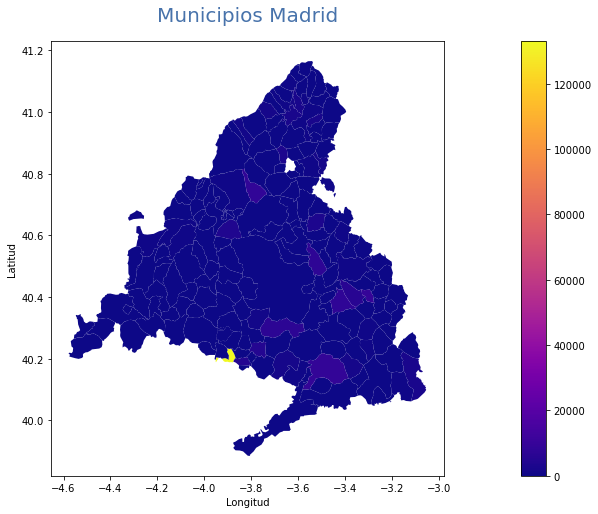

In [45]:
# Control del tamaño de la figura del mapa
fig, ax = plt.subplots(figsize=(10, 10))
 
# Control del título y los ejes
ax.set_title('Municipios Madrid', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Añadir la leyenda separada del mapa
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
 
# Mostrar el mapa finalizado
data.plot(column='PODEMOS-IU', cmap='plasma',legend=True, cax=cax, ax=ax, zorder=5)

In [46]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, ColumnDataSource
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, HoverTool
from bokeh.palettes import brewer
output_notebook()
import json


#Convert data to geojson for bokeh
wi_geojson=GeoJSONDataSource(geojson=data.to_json())

#wi_geojson=GeoJSONDataSource(geojson=result.to_json())

#wi_geojson=GeoJSONDataSource(geojson=map_municipios.to_json())

Loading BokehJS ...

In [47]:
color_mapper = LinearColorMapper(palette = brewer['RdBu'][10], low = 0, high = 1)
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
                     border_line_color=None,location = (0,0), orientation = 'horizontal')
hover = HoverTool(tooltips = [ ('municipio_x','@municipio_x'),('PP', '@PP'),
                               ('P.S.O.E.','@P.S.O.E.'),
                               ('Votos Totales','@Votos Totales')])
p = figure(title="Elecciones Madrid 2021", tools=[hover])
p.patches("xs","ys",source=wi_geojson,
          fill_color = {'field' :'PP', 'transform' : color_mapper})
p.add_layout(color_bar, 'below')
show(p)

In [48]:
# map_municipios
from bokeh.io import output_notebook
from bokeh.plotting import figure, ColumnDataSource
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, HoverTool
from bokeh.palettes import brewer
output_notebook()
import json


#Convert data to geojson for bokeh
# wi_geojson=GeoJSONDataSource(geojson=data.to_json())
# wi_geojson=GeoJSONDataSource(geojson=result.to_json())

wi_geojson=GeoJSONDataSource(geojson=map_municipios.to_json())

color_mapper = LinearColorMapper(palette = brewer['RdBu'][10], low = 0, high = 1)
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
                     border_line_color=None,location = (0,0), orientation = 'horizontal')
hover = HoverTool(tooltips = [ ('municipio','@municipio'),('PP', '@PP'),
                               ('psoe','@psoe'),
                               ('votos_totales','@votos_totales')])
p = figure(title="Elecciones Madrid 2021", tools=[hover])
p.patches("xs","ys",source=wi_geojson,
          fill_color = {'field' :'pp', 'transform' : color_mapper})
p.add_layout(color_bar, 'below')
show(p)

Loading BokehJS ...

In [55]:
# result
from bokeh.io import output_notebook
from bokeh.plotting import figure, ColumnDataSource
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, HoverTool
from bokeh.palettes import brewer
output_notebook()
import json


#Convert data to geojson for bokeh
# wi_geojson=GeoJSONDataSource(geojson=data.to_json())
# wi_geojson=GeoJSONDataSource(geojson=result.to_json())

result = GeoDataFrame(result)
wi_geojson=GeoJSONDataSource(geojson=result.to_json())

color_mapper = LinearColorMapper(palette = brewer['RdBu'][10], low = 0, high = 1)
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
                     border_line_color=None,location = (0,0), orientation = 'horizontal')
hover = HoverTool(tooltips = [ ('municipio','@municipio'),('pp', '@pp_share'),
                               ('psoe','@psoe_share'),
                               ('votos_totales','@votos_totales')])
p = figure(title="Elecciones Madrid 2021", tools=[hover])
p.patches("xs","ys",source=wi_geojson,
          fill_color = {'field' :'psoe_share', 'transform' : color_mapper})
p.add_layout(color_bar, 'below')
show(p)

Loading BokehJS ...

In [52]:
result[result['municipio']=='Madrid']['pp']

85    807189
Name: pp, dtype: int64

In [51]:
data[data['municipio']=='Madrid']['PP']

84    807189
Name: PP, dtype: int64